# We are training an agent using Q-Learning algorithm inside a popular environment OpenAI GYM.
Elon Musk is one of the founders of **OpenAI**


In [54]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 15000
MAX_STEPS = 100
LEARNING_RATE = 0.81
GAMMA = 0.96
RENDER = False # If you want to see training, u can set it True

epsilon = 0.9

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [55]:
rewards = []
for epsilon in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS):
    if RENDER:
      env.render()
    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state,:])
    next_state, reward, done, _ = env.step(action)
    Q[state, action] = Q[state,action] + LEARNING_RATE *(reward + GAMMA * np.max(Q[next_state,:])-Q[state,action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break # reached our goal

print(Q)
print(f'Average Reward:  {sum(rewards)/len(rewards)}:')

[[0.63454655 0.62582802 0.61428708 0.68676754]
 [0.55492342 0.67052135 0.72074822 0.69768958]
 [0.75949148 0.68680133 0.74433357 0.71533301]
 [0.59058595 0.09853603 0.12461126 0.71331427]
 [0.62778081 0.5914397  0.12443931 0.5071556 ]
 [0.         0.         0.         0.        ]
 [0.15048551 0.13311695 0.73177071 0.62399827]
 [0.         0.         0.         0.        ]
 [0.10331463 0.00506409 0.00504195 0.73090879]
 [0.12499953 0.83384127 0.68698583 0.84968135]
 [0.78706994 0.16614253 0.89875071 0.71165084]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.6996159  0.91577423 0.88232286 0.77130911]
 [0.82378954 0.85262468 0.96494383 0.98179657]
 [0.         0.         0.         0.        ]]
Average Reward:  0.015133333333333334:


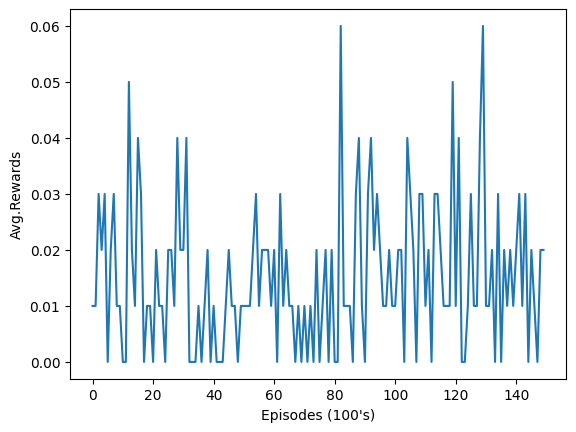

In [56]:
# we can plot the training progress 
# and see how the agent improves
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)
avg_rewards = []
for i in range(0,len(rewards),100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel("Avg.Rewards")
plt.xlabel("Episodes (100\'s)")
plt.show()